# Screen Capture.

In [18]:
import pandas as pd
from sklearn.utils import shuffle
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import ImageGrab
from sklearn.model_selection import train_test_split
import joblib
from sklearn.svm import SVC
import time
import cv2
import csv
import glob

In [4]:
image_folder = "captured_images/8/"
for i in range(0,49):
    time.sleep(8)
    im=ImageGrab.grab(bbox=(85,320,750,750))
    print("Saved....",i)
    im.save(image_folder+str(i)+'.png')
    print("Clear screen and redraw again....")
    

Saved.... 0
Clear screen and redraw again....
Saved.... 1
Clear screen and redraw again....
Saved.... 2
Clear screen and redraw again....
Saved.... 3
Clear screen and redraw again....
Saved.... 4
Clear screen and redraw again....
Saved.... 5
Clear screen and redraw again....
Saved.... 6
Clear screen and redraw again....
Saved.... 7
Clear screen and redraw again....
Saved.... 8
Clear screen and redraw again....
Saved.... 9
Clear screen and redraw again....


KeyboardInterrupt: 

# Generate DatSet

In [19]:
header = ["label"]
for i in range(0, 784):
    header.append("pixel" + str(i))

with open('dataset.csv', 'a') as f:
    writer = csv.writer(f)
    writer.writerow(header)

for label in range(10):
    dirList = glob.glob("captured_images/" + str(label) + "/*.png")
    for img_path in dirList:
        im = cv2.imread(img_path)
        im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)
        roi = cv2.resize(im_gray, (28, 28), interpolation=cv2.INTER_AREA)
        data = []
        data.append(label)
        rows, cols = roi.shape

        # Add pixel one by one into data array
        for i in range(rows):
            for j in range(cols):
                k = roi[i, j]
                if k > 100:
                    k = 1
                else:
                    k = 0
                data.append(k)

        with open('dataset.csv', 'a') as f:
            writer = csv.writer(f)
            writer.writerow(data)


# Load the dataset

In [21]:
data= pd.read_csv('dataset.csv')
#data.head()
data= shuffle(data)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
402,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
274,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
169,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
319,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
437,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
441,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# separation of dependent and independent variable

In [22]:
X = data.drop(["label"],axis=1)
Y= data["label"]

!pip install matplotlib
!pip install joblib

4


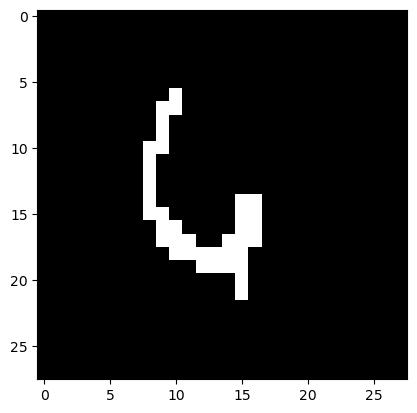

In [23]:
# Assuming X is your dataset and Y contains labels
idx = 222
img = X.loc[idx].values.reshape(28, 28).astype(float)  # Convert to float data type
print(Y[idx])
plt.imshow(img, cmap='gray')  # Display the grayscale image
plt.show()


In [24]:
#Train-Test split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)

# Fit the model using svc and also to save the model using joblib

In [25]:
classifier=SVC(kernel="linear", random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "model/digit_recognizer")

['model/digit_recognizer']

In [26]:
#calculate accuracy
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))

Accuracy=  0.6739130434782609


# Prediction of image in paint

Prediction: 1


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


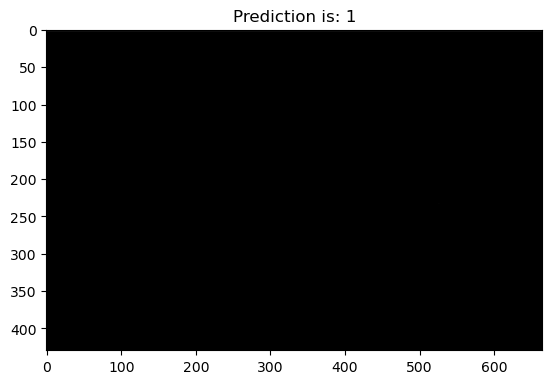

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 6


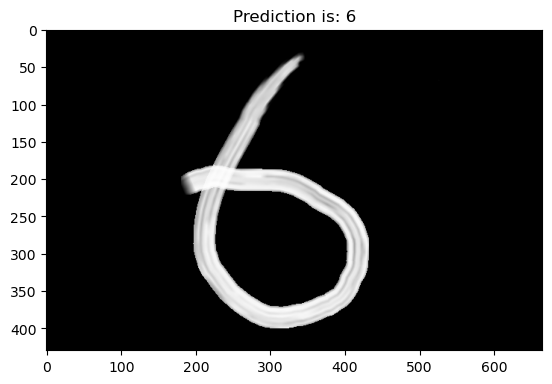

Prediction: 2


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


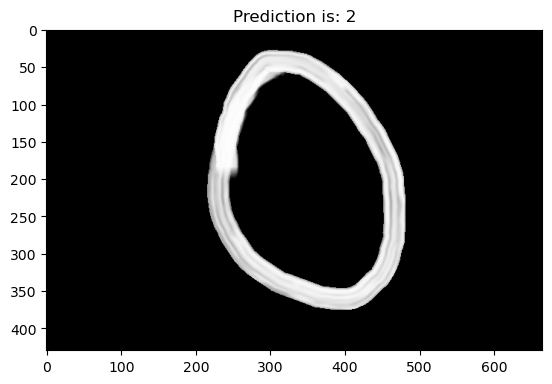

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


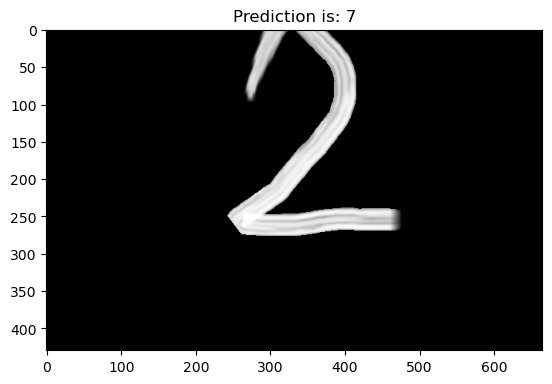

Prediction: 9


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


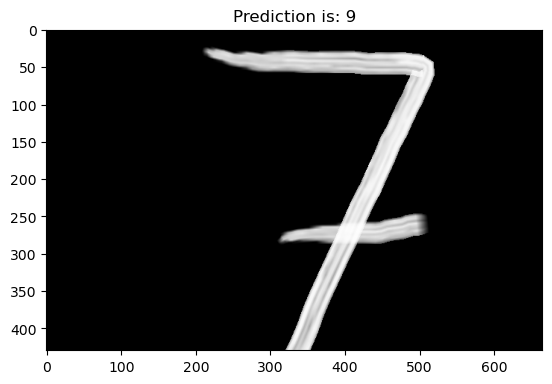

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


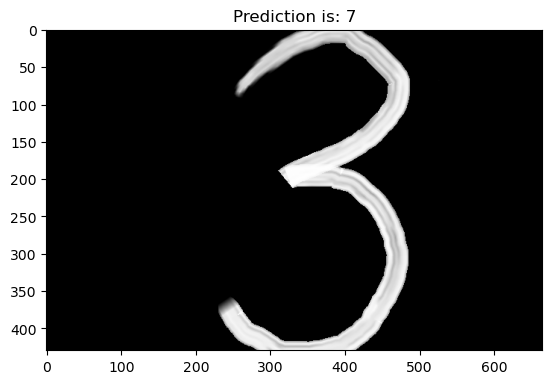

Prediction: 6


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


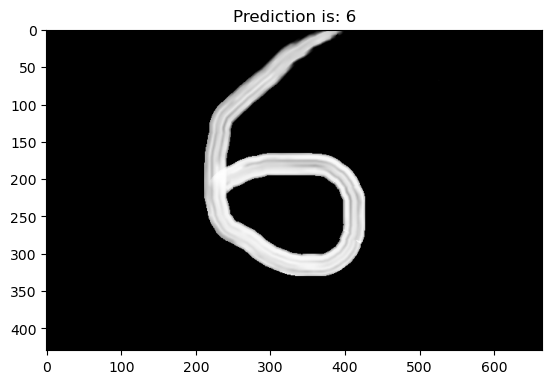

Prediction: 1


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


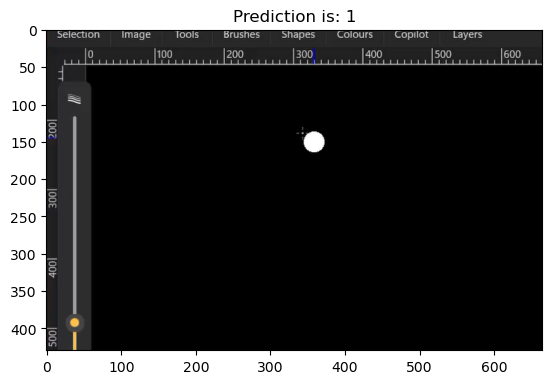

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


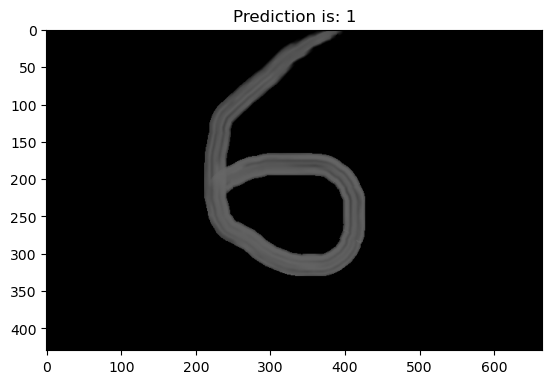

Prediction: 6


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


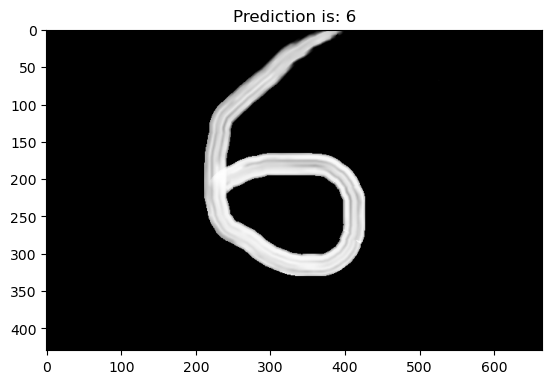

KeyboardInterrupt: 

In [27]:
model = joblib.load("model/digit_recognizer")
images_folder = "img/"

while True:
    # Capture the screen
    img = ImageGrab.grab(bbox=(85, 320, 750, 750))
   
    # Save the captured image
    img.save(images_folder + "img.png")
    
    # Read the saved image using OpenCV
    im = cv2.imread(images_folder + "img.png")
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)
   
    # Threshold the image
    ret, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28, 28), interpolation=cv2.INTER_AREA)
   
    rows, cols = roi.shape
   
    X = []
   
    # Add pixel one by one into data array
    for i in range(rows):
        for j in range(cols):
            k = roi[i, j]
            if k > 100:
                k = 1
            else:
                k = 0
            X.append(k)
           
    predictions = model.predict([X])
    print("Prediction:", predictions[0])
    
    # Display the image using Matplotlib
    plt.imshow(im)
    plt.title("Prediction is: " + str(predictions[0]))
    plt.show()
   
    time.sleep(10)  # Adjust the delay as needed
